## Visualize Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Misc import Misc

In [2]:
DATASET_PATH = "../data/LivingRoom_preprocessed_hack"
MISC = Misc(start_time=0, end_time=50000, sr=44100, target_sr=16000)

In [3]:
centroids_h1 = np.load(DATASET_PATH + "/Human1/centroid.npy")
deconvoled_trim_h1 = np.load(DATASET_PATH + "/Human1/deconvoled_trim.npy")
centroids_h2 = np.load(DATASET_PATH + "/Human2/centroid.npy")
deconvoled_trim_h2 = np.load(DATASET_PATH + "/Human2/deconvoled_trim.npy")

In [4]:
df_centroids_h1 = pd.DataFrame(centroids_h1, columns=['x', 'y'])
df_centroids_h2 = pd.DataFrame(centroids_h2, columns=['x', 'y'])
df_centroids_h1

,x,y
0,-3231.329347,-1127.877715
1,-3198.541079,-744.510066
2,-3192.977627,-248.266788
3,-3018.418253,334.938546
4,-3015.779532,826.440201
...,...,...
995,-2232.655302,-3227.790684
996,-2230.893046,-2974.853017
997,-1717.899236,-3166.596485
998,-1808.603375,-2779.130384


In [5]:
print("Human 1 Description:\n",df_centroids_h1.describe())
print("Human 2 Description:\n",df_centroids_h2.describe())

Human 1 Description:
                  x            y
count  1000.000000  1000.000000
mean  -1951.874645  -975.494269
std    1063.168357  1408.316313
min   -4058.242136 -3499.887676
25%   -2793.916664 -2444.690376
50%   -2057.874270  -839.081832
75%   -1021.706420   268.779611
max      56.834894  1542.259690
Human 2 Description:
                  x            y
count   104.000000   104.000000
mean  -2091.081613  -837.472064
std    1115.778928  1147.811987
min   -4212.455241 -3050.124740
25%   -3008.410329 -1487.150522
50%   -2243.877343  -884.802815
75%   -1175.886278    20.876289
max     -13.170370  1256.133175


## Human Locations in the Living Room

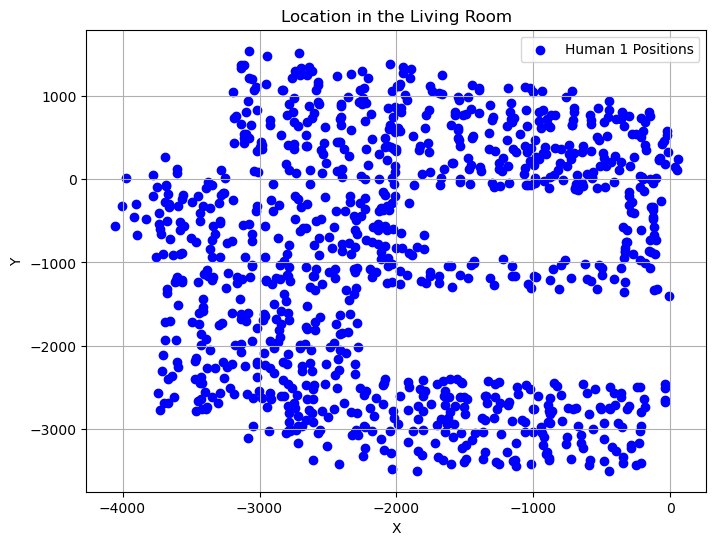

In [6]:
# Human 1
if 'y' in df_centroids_h1.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_centroids_h1['x'], df_centroids_h1['y'], color='blue', label='Human 1 Positions')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Location in the Living Room')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print('Column Y does not exist in the dataframe')

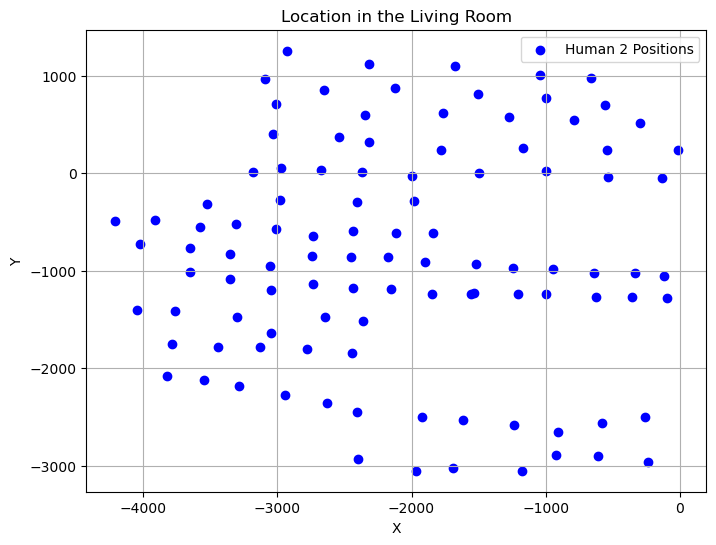

In [7]:
# Human 2 

if 'y' in df_centroids_h2.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_centroids_h2['x'], df_centroids_h2['y'], color='blue', label='Human 2 Positions')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Location in the Living Room')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print('Column Y does not exist in the dataframe')

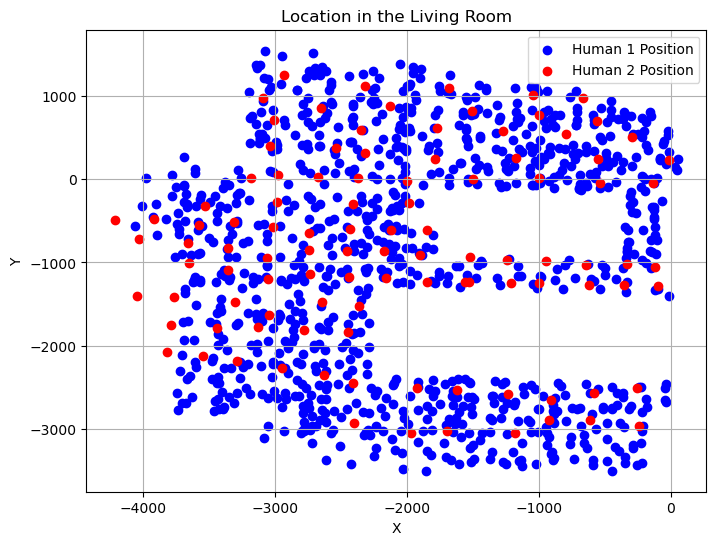

In [10]:
# Superposition of both humans' locations

plt.figure(figsize=(8, 6))

if 'y' in df_centroids_h1.columns:
    plt.scatter(df_centroids_h1['x'], df_centroids_h1['y'], color='blue', label='Human 1 Position')

if 'y' in df_centroids_h2.columns:
    plt.scatter(df_centroids_h2['x'], df_centroids_h2['y'], color='red', label='Human 2 Position')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Location in the Living Room')
plt.legend()
plt.grid(True)
plt.show()

# Plot Signals Samples

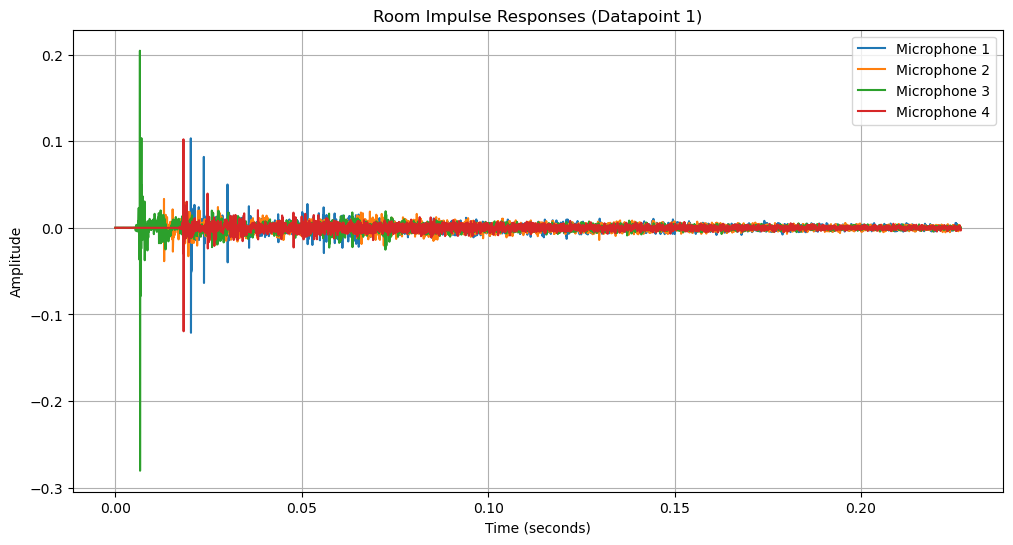

In [11]:
N_datapoints, N_Microphones, N_samples = deconvoled_trim_h1.shape

# Choose a specific datapoint and time sample range to plot
datapoint_index = 1  
time_sample_start = 0  
time_sample_end = 10000 

sampling_rate = 44100
time_axis = np.arange(time_sample_end - time_sample_start) / sampling_rate

# Plot the RIRs for each microphone channel
plt.figure(figsize=(12, 6))
for microphone_index in range(N_Microphones):
    rir = deconvoled_trim_h1[datapoint_index, microphone_index, time_sample_start:time_sample_end]
    plt.plot(time_axis, rir, label=f"Microphone {microphone_index + 1}")

plt.title(f"Room Impulse Responses (Datapoint {datapoint_index})")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

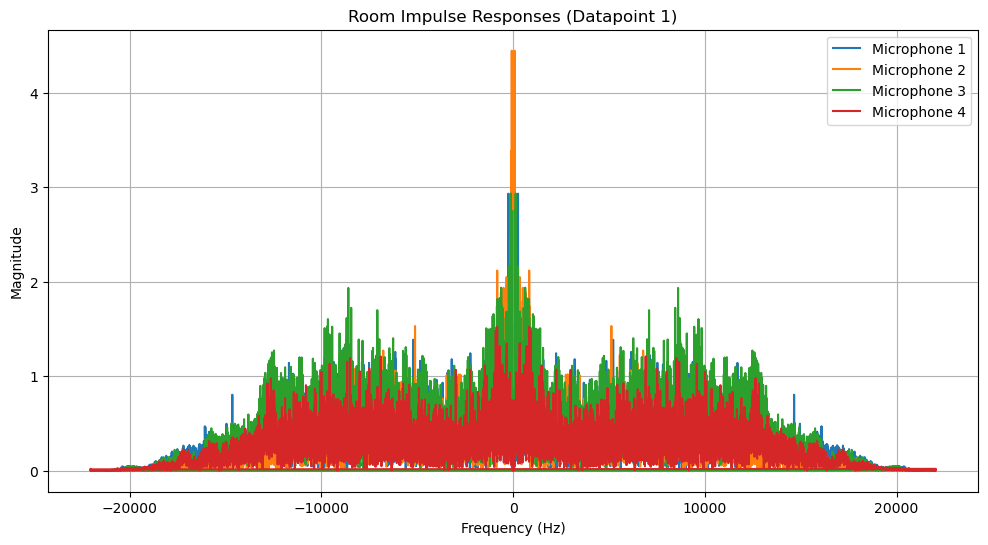

In [12]:
# Plot the RIRs for each microphone channel in the frequency domain
plt.figure(figsize=(12, 6))
for microphone_index in range(N_Microphones):
    # Extract the RIR for the current microphone channel
    rir = deconvoled_trim_h1[datapoint_index, microphone_index, time_sample_start:time_sample_end]
    
    # Compute the FFT
    rir_fft = np.fft.fft(rir)
    
    # Compute the frequency axis
    freq_axis = np.fft.fftfreq(len(rir), 1 / sampling_rate)
    
    # Plot the magnitude of the FFT (absolute value)
    plt.plot(freq_axis, np.abs(rir_fft), label=f"Microphone {microphone_index + 1}")

plt.title(f"Room Impulse Responses (Datapoint {datapoint_index})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

## Example of a Mel Spectogram Graph

Mel spectrogram shape: (128, 1304)


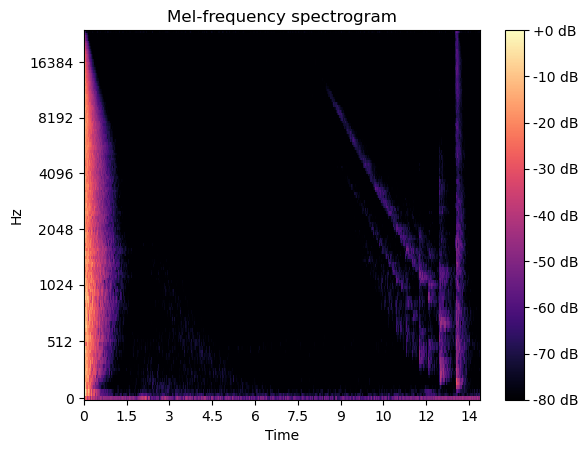

In [13]:
mel_spectrogram, mfccs = MISC.visualize_and_extract_spectrogram(data=deconvoled_trim_h1, microphone_index=1, sample_index=965)